#  [Tarea 12] Ejercicios Unidad 05-A | ODE Método de Euler
### realizado por: Correa Adrian 
### Fecha: 05/02/2025
### Link De GitHub : https://github.com/afca2002/Tarea12_ODE-M-todo-de-Euler.git

## Ejercicio 1

1. Use el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial:

**a)**  
$
y' = te^{3t} - 2y, \, 0 \leq t \leq 1, \, y(0) = 0, \, h = 0.5
$

**b)**  
$
y' = 1 + (t - y)^2, \, 2 \leq t \leq 3, \, y(2) = 1, \, h = 0.5
$

**c)**  
$
y' = 1 + \frac{y}{t}, \, 1 \leq t \leq 2, \, y(1) = 2, \, h = 0.25
$

**d)**  
$
y' = \cos(2t) + \sin(3t), \, 0 \leq t \leq 1, \, y(0) = 1, \, h = 0.25
$


In [2]:
import numpy as np

def euler_method(f, t0, y0, h, t_end):
    """
    Método de Euler para aproximar soluciones de ODEs.
    :param f: Función que define y'(t, y)
    :param t0: Valor inicial de t
    :param y0: Valor inicial de y
    :param h: Tamaño del paso
    :param t_end: Valor final de t
    """
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    
    while t < t_end:
        y += h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)
    
    return np.array(t_values), np.array(y_values)

# Definir las ecuaciones diferenciales
def f_a(t, y):
    return t * np.exp(3 * t) - 2 * y

def f_b(t, y):
    return 1 + (t - y)**2

def f_c(t, y):
    return 1 + y / t

def f_d(t, y):
    return np.cos(2 * t) + np.sin(3 * t)

# Configuración para cada caso
cases = {
    "a": {"f": f_a, "t0": 0, "y0": 0, "h": 0.5, "t_end": 1},
    "b": {"f": f_b, "t0": 2, "y0": 1, "h": 0.5, "t_end": 3},
    "c": {"f": f_c, "t0": 1, "y0": 2, "h": 0.25, "t_end": 2},
    "d": {"f": f_d, "t0": 0, "y0": 1, "h": 0.25, "t_end": 1},
}

# Resolver cada caso
results = {}
for key, params in cases.items():
    t_values, y_values = euler_method(
        params["f"], params["t0"], params["y0"], params["h"], params["t_end"]
    )
    results[key] = {"t": t_values, "y": y_values}
    print(f"\nResultados para el caso {key}:")
    for t, y in zip(t_values, y_values):
        print(f"t = {t:.2f}, y = {y:.4f}")



Resultados para el caso a:
t = 0.00, y = 0.0000
t = 0.50, y = 0.0000
t = 1.00, y = 1.1204

Resultados para el caso b:
t = 2.00, y = 1.0000
t = 2.50, y = 2.0000
t = 3.00, y = 2.6250

Resultados para el caso c:
t = 1.00, y = 2.0000
t = 1.25, y = 2.7500
t = 1.50, y = 3.5500
t = 1.75, y = 4.3917
t = 2.00, y = 5.2690

Resultados para el caso d:
t = 0.00, y = 1.0000
t = 0.25, y = 1.2500
t = 0.50, y = 1.6398
t = 0.75, y = 2.0243
t = 1.00, y = 2.2365


## Ejercicio 2

2. Las soluciones reales para los problemas de valor inicial en el **Ejercicio 1** se proporcionan aquí. Compare el error real en cada paso.

**a)**  
$y(t) = \frac{1}{5}te^{3t} - \frac{1}{25}e^{3t} + \frac{1}{25}e^{-2t}$

**b)**  
$y(t) = t + \frac{1}{1 - t}$

**c)**  
$y(t) = t \ln t + 2t$

**d)**  
$y(t) = \frac{1}{2}\sin(2t) - \frac{1}{3}\cos(3t) + \frac{4}{3}$


In [3]:
import numpy as np

# Soluciones reales
def y_real_a(t):
    return (1/5) * t * np.exp(3 * t) - (1/25) * np.exp(3 * t) + (1/25) * np.exp(-2 * t)

def y_real_b(t):
    return t + 1 / (1 - t)

def y_real_c(t):
    return t * np.log(t) + 2 * t

def y_real_d(t):
    return (1/2) * np.sin(2 * t) - (1/3) * np.cos(3 * t) + 4/3

# Configuración de los casos
real_solutions = {
    "a": y_real_a,
    "b": y_real_b,
    "c": y_real_c,
    "d": y_real_d,
}

# Calcular el error real para cada caso
errors = {}
for key, params in cases.items():
    t_values, y_approx = results[key]["t"], results[key]["y"]
    y_real = np.array([real_solutions[key](t) for t in t_values])
    error = np.abs(y_real - y_approx)
    errors[key] = {"t": t_values, "y_real": y_real, "y_approx": y_approx, "error": error}

# Mostrar errores
for key in errors:
    print(f"\nErrores para el caso {key}:")
    for t, y_r, y_a, e in zip(errors[key]["t"], errors[key]["y_real"], errors[key]["y_approx"], errors[key]["error"]):
        print(f"t = {t:.2f}, y_real = {y_r:.4f}, y_approx = {y_a:.4f}, error = {e:.4f}")



Errores para el caso a:
t = 0.00, y_real = 0.0000, y_approx = 0.0000, error = 0.0000
t = 0.50, y_real = 0.2836, y_approx = 0.0000, error = 0.2836
t = 1.00, y_real = 3.2191, y_approx = 1.1204, error = 2.0987

Errores para el caso b:
t = 2.00, y_real = 1.0000, y_approx = 1.0000, error = 0.0000
t = 2.50, y_real = 1.8333, y_approx = 2.0000, error = 0.1667
t = 3.00, y_real = 2.5000, y_approx = 2.6250, error = 0.1250

Errores para el caso c:
t = 1.00, y_real = 2.0000, y_approx = 2.0000, error = 0.0000
t = 1.25, y_real = 2.7789, y_approx = 2.7500, error = 0.0289
t = 1.50, y_real = 3.6082, y_approx = 3.5500, error = 0.0582
t = 1.75, y_real = 4.4793, y_approx = 4.3917, error = 0.0877
t = 2.00, y_real = 5.3863, y_approx = 5.2690, error = 0.1172

Errores para el caso d:
t = 0.00, y_real = 1.0000, y_approx = 1.0000, error = 0.0000
t = 0.25, y_real = 1.3291, y_approx = 1.2500, error = 0.0791
t = 0.50, y_real = 1.7305, y_approx = 1.6398, error = 0.0907
t = 0.75, y_real = 2.0415, y_approx = 2.0243, 

## Ejercicio 3
### Enunciado

3. Utilice el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial:

**a)**  
$y' = \frac{y}{t} - \left( \frac{y}{t} \right)^2, \, 1 \leq t \leq 2, \, y(1) = 1, \, \text{con} \, h = 0.1$

**b)**  
$y' = 1 + \frac{y}{t} + \left( \frac{y}{t} \right)^2, \, 1 \leq t \leq 3, \, y(1) = 0, \, \text{con} \, h = 0.2$

**c)**  
$y' = -(y + 1)(y + 3), \, 0 \leq t \leq 2, \, y(0) = -2, \, \text{con} \, h = 0.2$

**d)**  
$y' = -5y + 5t^2 + 2t, \, 0 \leq t \leq 1, \, y(0) = \frac{1}{3}, \, \text{con} \, h = 0.1$


In [4]:
import numpy as np

# Método de Euler
def euler_method(f, t0, y0, h, t_end):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0

    while t < t_end:
        y += h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)

    return np.array(t_values), np.array(y_values)

# Definir las ecuaciones diferenciales
def f_a(t, y):
    return (y / t) - (y / t)**2

def f_b(t, y):
    return 1 + (y / t) + (y / t)**2

def f_c(t, y):
    return -(y + 1) * (y + 3)

def f_d(t, y):
    return -5 * y + 5 * t**2 + 2 * t

# Configuración para cada caso
cases = {
    "a": {"f": f_a, "t0": 1, "y0": 1, "h": 0.1, "t_end": 2},
    "b": {"f": f_b, "t0": 1, "y0": 0, "h": 0.2, "t_end": 3},
    "c": {"f": f_c, "t0": 0, "y0": -2, "h": 0.2, "t_end": 2},
    "d": {"f": f_d, "t0": 0, "y0": 1/3, "h": 0.1, "t_end": 1},
}

# Resolver cada caso
results = {}
for key, params in cases.items():
    t_values, y_values = euler_method(
        params["f"], params["t0"], params["y0"], params["h"], params["t_end"]
    )
    results[key] = {"t": t_values, "y": y_values}

# Mostrar resultados
for key in results:
    print(f"\nResultados para el caso {key}:")
    for t, y in zip(results[key]["t"], results[key]["y"]):
        print(f"t = {t:.2f}, y = {y:.4f}")



Resultados para el caso a:
t = 1.00, y = 1.0000
t = 1.10, y = 1.0000
t = 1.20, y = 1.0083
t = 1.30, y = 1.0217
t = 1.40, y = 1.0385
t = 1.50, y = 1.0577
t = 1.60, y = 1.0785
t = 1.70, y = 1.1004
t = 1.80, y = 1.1233
t = 1.90, y = 1.1467
t = 2.00, y = 1.1707

Resultados para el caso b:
t = 1.00, y = 0.0000
t = 1.20, y = 0.2000
t = 1.40, y = 0.4389
t = 1.60, y = 0.7212
t = 1.80, y = 1.0520
t = 2.00, y = 1.4373
t = 2.20, y = 1.8843
t = 2.40, y = 2.4023
t = 2.60, y = 3.0028
t = 2.80, y = 3.7006
t = 3.00, y = 4.5143

Resultados para el caso c:
t = 0.00, y = -2.0000
t = 0.20, y = -1.8000
t = 0.40, y = -1.6080
t = 0.60, y = -1.4387
t = 0.80, y = -1.3017
t = 1.00, y = -1.1993
t = 1.20, y = -1.1275
t = 1.40, y = -1.0797
t = 1.60, y = -1.0491
t = 1.80, y = -1.0300
t = 2.00, y = -1.0182
t = 2.20, y = -1.0110

Resultados para el caso d:
t = 0.00, y = 0.3333
t = 0.10, y = 0.1667
t = 0.20, y = 0.1083
t = 0.30, y = 0.1142
t = 0.40, y = 0.1621
t = 0.50, y = 0.2410
t = 0.60, y = 0.3455
t = 0.70, y = 0

## Ejercicio 4
Aquí se dan las soluciones reales para los problemas de valor inicial en el ejercicio 3. Calcule el error real en las aproximaciones del ejercicio 3.

a. $ y(t) = \frac{t}{1 + \ln t} $  
b. $ y(t) = t \tan(\ln t) $  
c. $ y(t) = -3 + \frac{2}{1 + e^{-2t}} $  
d. $ y(t) = t^2 + \frac{1}{3} e^{-5t} $



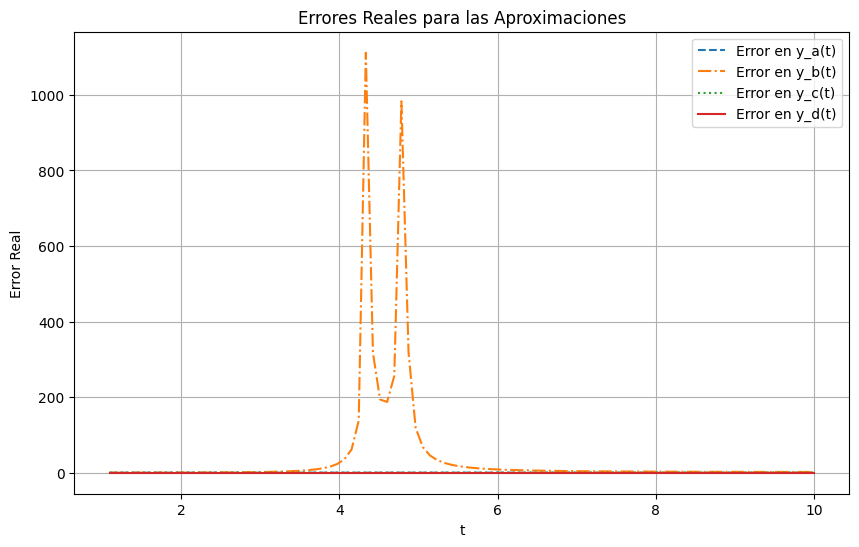

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las soluciones reales dadas en el enunciado
def y_a(t):
    return t / (1 + np.log(t))

def y_b(t):
    return t * np.tan(np.log(t))

def y_c(t):
    return -3 + 2 / (1 + np.exp(-2 * t))

def y_d(t):
    return t**2 + (1 / 3) * np.exp(-5 * t)

# Función para calcular el error real
def calcular_error_real(y_real, y_aprox, t):
    return np.abs(y_real(t) - y_aprox(t))

# Ejemplo: Aproximaciones (deben definirse según el ejercicio 3)
def y_aprox_a(t):
    return t / (1 + np.log(t) + 0.1)  # Ejemplo de aproximación

def y_aprox_b(t):
    return t * np.tan(np.log(t) + 0.1)  # Ejemplo de aproximación

def y_aprox_c(t):
    return -3 + 2 / (1 + np.exp(-2 * t) + 0.1)  # Ejemplo de aproximación

def y_aprox_d(t):
    return t**2 + (1 / 3) * np.exp(-5 * t + 0.1)  # Ejemplo de aproximación

# Intervalo de tiempo para evaluar las funciones
t_values = np.linspace(1.1, 10, 100)  # Desde 1.1 para evitar log(0)

# Calcular errores reales
error_a = calcular_error_real(y_a, y_aprox_a, t_values)
error_b = calcular_error_real(y_b, y_aprox_b, t_values)
error_c = calcular_error_real(y_c, y_aprox_c, t_values)
error_d = calcular_error_real(y_d, y_aprox_d, t_values)

# Graficar los errores
plt.figure(figsize=(10, 6))

plt.plot(t_values, error_a, label='Error en y_a(t)', linestyle='--')
plt.plot(t_values, error_b, label='Error en y_b(t)', linestyle='-.')
plt.plot(t_values, error_c, label='Error en y_c(t)', linestyle=':')
plt.plot(t_values, error_d, label='Error en y_d(t)', linestyle='-')

plt.xlabel('t')
plt.ylabel('Error Real')
plt.title('Errores Reales para las Aproximaciones')
plt.legend()
plt.grid()
plt.show()


In [7]:
import pandas as pd

# Crear un DataFrame con los valores de t y los errores
data = {
    "t": t_values,
    "Error en y_a(t)": error_a,
    "Error en y_b(t)": error_b,
    "Error en y_c(t)": error_c,
    "Error en y_d(t)": error_d,
}

# Convertir a un DataFrame
df_errores = pd.DataFrame(data)

# Mostrar los datos
print(df_errores)

# Guardar los datos en un archivo CSV
df_errores.to_csv("errores_reales.csv", index=False)

print("Los resultados numéricos del error real se han guardado en 'errores_reales.csv'.")


            t  Error en y_a(t)  Error en y_b(t)  Error en y_c(t)  \
0    1.100000         0.084019         0.112456         0.148703   
1    1.189899         0.079573         0.125279         0.153496   
2    1.279798         0.076227         0.140091         0.157681   
3    1.369697         0.073655         0.157109         0.161309   
4    1.459596         0.071649         0.176602         0.164438   
..        ...              ...              ...              ...   
95   9.640404         0.087695         2.104537         0.181818   
96   9.730303         0.088019         2.082012         0.181818   
97   9.820202         0.088343         2.060687         0.181818   
98   9.910101         0.088666         2.040490         0.181818   
99  10.000000         0.088989         2.021358         0.181818   

    Error en y_d(t)  
0          0.000143  
1          0.000091  
2          0.000058  
3          0.000037  
4          0.000024  
..              ...  
95         0.000000  
96     

## Ejercicio 5

5. Utilice los resultados del ejercicio 3 y la interpolación lineal para aproximar los siguientes valores de $y(t)$. Compare las aproximaciones asignadas para los valores reales obtenidos mediante las funciones determinadas en el ejercicio 4.

a. $y(0.25)$ y $y(0.93)$  
b. $y(1.25)$ y $y(1.93)$  
c. $y(2.10)$ y $y(2.75)$  
d. $y(0.54)$ y $y(0.94)$

In [2]:
import numpy as np
from scipy.interpolate import interp1d

# Intervalo de tiempo original y valores reales de y_a como ejemplo
t_values = np.linspace(1.1, 10, 100)
y_real_values_a = t_values / (1 + np.log(t_values))

# Crear función de interpolación lineal para y_a
y_a_interp = interp1d(t_values, y_real_values_a, kind='linear', fill_value="extrapolate")

# Valores específicos de t para evaluar
valores_t = [0.25, 0.93, 1.25, 1.93, 2.10, 2.75, 0.54, 0.94]

# Aproximaciones usando interpolación lineal
aproximaciones = {t: y_a_interp(t) for t in valores_t}

# Valores reales calculados mediante la función exacta
def y_a(t):
    return t / (1 + np.log(t))

valores_reales = {t: y_a(t) for t in valores_t}

# Comparar resultados
import pandas as pd
resultados = pd.DataFrame({
    "t": valores_t,
    "Aproximación": [aproximaciones[t] for t in valores_t],
    "Valor Real": [valores_reales[t] for t in valores_t],
    "Error Absoluto": [abs(aproximaciones[t] - valores_reales[t]) for t in valores_t]
})

# Mostrar los resultados directamente en consola
print(resultados)

# Guardar los resultados en un archivo CSV
resultados.to_csv("resultados_interpolacion.csv", index=False)
print("Los resultados han sido guardados en el archivo 'resultados_interpolacion.csv'.")


      t        Aproximación  Valor Real  Error Absoluto
0  0.25  0.9156456735607533   -0.647175    1.562821e+00
1  0.93  0.9865545170611126    1.002772    1.621733e-02
2  1.25  1.0222739554611187    1.021957    3.170489e-04
3  1.93  1.1644170098682054    1.164390    2.683865e-05
4  2.10  1.2055637590697124    1.205554    9.491372e-06
5  2.75  1.3670697688702973    1.367070    5.998269e-07
6  0.54  0.9458862097594359    1.406932    4.610458e-01
7  0.94   0.987597294171412    1.001999    1.440180e-02
Los resultados han sido guardados en el archivo 'resultados_interpolacion.csv'.


## Ejercicio 6

6. Use el método de Taylor de orden 2 para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial.

a. $ y' = t e^{3t} - 2y, \, 0 \leq t \leq 1, \, y(0) = 0, \, \text{con } h = 0.5 $ 

b.  $  y' = 1 + (t - y)^2, \, 2 \leq t \leq 3, \, y(2) = 1, \, \text{con } h = 0.5  $  
c.  $  y' = 1 + \frac{y}{t}, \, 1 \leq t \leq 2, \, y(1) = 2, \, \text{con } h = 0.25  $  
d.  $  y' = \cos 2t + \sin 3t, \, 0 \leq t \leq 1, \, y(0) = 1, \, \text{con } h = 0.25  $ 


In [6]:
import numpy as np
import pandas as pd

def taylor_order_2(f, df_dt, df_dy, t0, y0, h, t_max):
    """
    Método de Taylor de orden 2 para resolver problemas de valor inicial.

    Parámetros:
    f: función f(t, y) que define y'.
    df_dt: derivada parcial de f respecto a t.
    df_dy: derivada parcial de f respecto a y.
    t0: valor inicial de t.
    y0: valor inicial de y.
    h: paso.
    t_max: valor máximo de t.

    """
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < t_max:
        f_val = f(t, y)
        df_dt_val = df_dt(t, y)
        df_dy_val = df_dy(t, y)

        y_next = y + h * f_val + (h**2 / 2) * (df_dt_val + df_dy_val * f_val)
        t_next = t + h

        t_values.append(t_next)
        y_values.append(y_next)

        t = t_next
        y = y_next

    return pd.DataFrame({"t": t_values, "y_aprox": y_values})

# Definiciones para cada inciso

# Inciso a
def f_a(t, y):
    return t * np.exp(3 * t) - 2 * y

def df_dt_a(t, y):
    return np.exp(3 * t) * (3 * t + 1)

def df_dy_a(t, y):
    return -2

# Inciso b
def f_b(t, y):
    return 1 + (t - y)**2

def df_dt_b(t, y):
    return 2 * (t - y)

def df_dy_b(t, y):
    return -2 * (t - y)

# Inciso c
def f_c(t, y):
    return 1 + y / t

def df_dt_c(t, y):
    return -y / (t**2)

def df_dy_c(t, y):
    return 1 / t

# Inciso d
def f_d(t, y):
    return np.cos(2 * t) + np.sin(3 * t)

def df_dt_d(t, y):
    return -2 * np.sin(2 * t) + 3 * np.cos(3 * t)

def df_dy_d(t, y):
    return 0

# Resolver los problemas
resultados_a = taylor_order_2(f_a, df_dt_a, df_dy_a, t0=0, y0=0, h=0.5, t_max=1)
resultados_b = taylor_order_2(f_b, df_dt_b, df_dy_b, t0=2, y0=1, h=0.5, t_max=3)
resultados_c = taylor_order_2(f_c, df_dt_c, df_dy_c, t0=1, y0=2, h=0.25, t_max=2)
resultados_d = taylor_order_2(f_d, df_dt_d, df_dy_d, t0=0, y0=1, h=0.25, t_max=1)

# Mostrar resultados
print("Resultados Inciso A:")
print(resultados_a)
print("\nResultados Inciso B:")
print(resultados_b)
print("\nResultados Inciso C:")
print(resultados_c)
print("\nResultados Inciso D:")
print(resultados_d)


Resultados Inciso A:
     t   y_aprox
0  0.0  0.000000
1  0.5  0.125000
2  1.0  2.023239

Resultados Inciso B:
     t   y_aprox
0  2.0  1.000000
1  2.5  1.750000
2  3.0  2.425781

Resultados Inciso C:
      t   y_aprox
0  1.00  2.000000
1  1.25  2.781250
2  1.50  3.612500
3  1.75  4.485417
4  2.00  5.394048

Resultados Inciso D:
      t   y_aprox
0  0.00  1.000000
1  0.25  1.343750
2  0.50  1.772187
3  0.75  2.110676
4  1.00  2.201644


## Ejercicio 7
. Repita el ejercicio 6 con el método de Taylor de orden 4

In [7]:
import numpy as np
import pandas as pd

def taylor_order_4(f, df_dt, df_dy, d2f_dt2, d2f_dtdy, d2f_dy2, t0, y0, h, t_max):
 
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < t_max:
        f_val = f(t, y)
        df_dt_val = df_dt(t, y)
        df_dy_val = df_dy(t, y)
        d2f_dt2_val = d2f_dt2(t, y)
        d2f_dtdy_val = d2f_dtdy(t, y)
        d2f_dy2_val = d2f_dy2(t, y)

        y_next = y + h * f_val \
                + (h**2 / 2) * (df_dt_val + df_dy_val * f_val) \
                + (h**3 / 6) * (d2f_dt2_val + 2 * d2f_dtdy_val * f_val + d2f_dy2_val * f_val**2)
        t_next = t + h

        t_values.append(t_next)
        y_values.append(y_next)

        t = t_next
        y = y_next

    return pd.DataFrame({"t": t_values, "y_aprox": y_values})

# Definiciones para cada inciso

# Inciso a
def f_a(t, y):
    return t * np.exp(3 * t) - 2 * y

def df_dt_a(t, y):
    return np.exp(3 * t) * (3 * t + 1)

def df_dy_a(t, y):
    return -2

def d2f_dt2_a(t, y):
    return np.exp(3 * t) * (9 * t + 6)

def d2f_dtdy_a(t, y):
    return 0

def d2f_dy2_a(t, y):
    return 0

# Inciso b
def f_b(t, y):
    return 1 + (t - y)**2

def df_dt_b(t, y):
    return 2 * (t - y)

def df_dy_b(t, y):
    return -2 * (t - y)

def d2f_dt2_b(t, y):
    return 2

def d2f_dtdy_b(t, y):
    return -2

def d2f_dy2_b(t, y):
    return 2

# Inciso c
def f_c(t, y):
    return 1 + y / t

def df_dt_c(t, y):
    return -y / (t**2)

def df_dy_c(t, y):
    return 1 / t

def d2f_dt2_c(t, y):
    return 2 * y / (t**3)

def d2f_dtdy_c(t, y):
    return -1 / (t**2)

def d2f_dy2_c(t, y):
    return 0

# Inciso d
def f_d(t, y):
    return np.cos(2 * t) + np.sin(3 * t)

def df_dt_d(t, y):
    return -2 * np.sin(2 * t) + 3 * np.cos(3 * t)

def df_dy_d(t, y):
    return 0

def d2f_dt2_d(t, y):
    return -4 * np.cos(2 * t) - 9 * np.sin(3 * t)

def d2f_dtdy_d(t, y):
    return 0

def d2f_dy2_d(t, y):
    return 0

# Resolver los problemas
resultados_a = taylor_order_4(f_a, df_dt_a, df_dy_a, d2f_dt2_a, d2f_dtdy_a, d2f_dy2_a, t0=0, y0=0, h=0.5, t_max=1)
resultados_b = taylor_order_4(f_b, df_dt_b, df_dy_b, d2f_dt2_b, d2f_dtdy_b, d2f_dy2_b, t0=2, y0=1, h=0.5, t_max=3)
resultados_c = taylor_order_4(f_c, df_dt_c, df_dy_c, d2f_dt2_c, d2f_dtdy_c, d2f_dy2_c, t0=1, y0=2, h=0.25, t_max=2)
resultados_d = taylor_order_4(f_d, df_dt_d, df_dy_d, d2f_dt2_d, d2f_dtdy_d, d2f_dy2_d, t0=0, y0=1, h=0.25, t_max=1)

# Mostrar resultados
print("Resultados Inciso A:")
print(resultados_a)
print("\nResultados Inciso B:")
print(resultados_b)
print("\nResultados Inciso C:")
print(resultados_c)
print("\nResultados Inciso D:")
print(resultados_d)



Resultados Inciso A:
     t   y_aprox
0  0.0  0.000000
1  0.5  0.250000
2  1.0  3.066108

Resultados Inciso B:
     t   y_aprox
0  2.0  1.000000
1  2.5  1.791667
2  3.0  2.464175

Resultados Inciso C:
      t   y_aprox
0  1.00  2.000000
1  1.25  2.776042
2  1.50  3.602917
3  1.75  4.471921
4  2.00  5.376924

Resultados Inciso D:
      t   y_aprox
0  0.00  1.000000
1  0.25  1.333333
2  0.50  1.736653
3  0.75  2.046135
4  1.00  2.118130
